In [1]:
import pandas as pd
import numpy as np
from tensorflow import keras
import tensorflow as tf
import statsmodels as sm

In [2]:
data = pd.read_csv('data2.csv')

In [4]:
data.head()

,Designation,Discovery Date YYYY-MM-DD,H (mag),MOID (AU),q (AU),Q (AU),period (yr),i (deg),PHA,Orbit Class
0,419880 (2011 AH37),01/07/2011,19.7,0.035,0.84,4.26,4.06,9.65,Y,Apollo
1,419624 (2010 SO16),09/17/2010,20.5,0.028,0.93,1.08,1.00,14.52,Y,Apollo
2,414772 (2010 OC103),07/28/2010,19.0,0.333,0.39,2.00,1.31,23.11,N,Apollo
3,414746 (2010 EH20),03/06/2010,18.0,0.268,1.25,3.99,4.24,23.89,N,Amor
4,407324 (2010 OB101),07/18/2010,20.7,0.111,0.77,2.46,2.06,9.12,N,Apollo


In [5]:
data.columns

Index(['Designation', 'Discovery Date YYYY-MM-DD', 'H (mag)', 'MOID (AU)',
       'q (AU)', 'Q (AU)', 'period (yr)', 'i (deg)', 'PHA', 'Orbit Class'],
      dtype='object')

In [44]:
array_null_indices = np.where(pd.isnull(data['H (mag)']))
#pd.isnull(data['H (mag)'])
#len(data['H (mag)'].isnull)

In [45]:
array_null_indices = array_null_indices[0]

In [46]:
array_null_indices = array_null_indices.tolist()

In [61]:
#data.iloc[198,:]

In [60]:
data['Discovery Date YYYY-MM-DD'] = pd.to_datetime(data['Discovery Date YYYY-MM-DD'])

In [8]:
data['H (mag)']

0      19.7
1      20.5
2      19.0
3      18.0
4      20.7
       ... 
197    21.5
198     NaN
199    17.7
200    19.9
201    18.3
Name: H (mag), Length: 202, dtype: float64

In [67]:
model = keras.Sequential([
    #keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(1, activation='relu'),
    keras.layers.Dense(1, activation='relu')
])

In [ ]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])
model.fit(data['H (mag)'], data['H (mag)'], epochs=10)


In [72]:
dir(tf.losses)

['Reduction',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'absolute_difference',
 'add_loss',
 'compute_weighted_loss',
 'cosine_distance',
 'get_losses',
 'get_regularization_loss',
 'get_regularization_losses',
 'get_total_loss',
 'hinge_loss',
 'huber_loss',
 'log_loss',
 'mean_pairwise_squared_error',
 'mean_squared_error',
 'sigmoid_cross_entropy',
 'softmax_cross_entropy',
 'sparse_softmax_cross_entropy']

In [87]:
data = data.sort_values(by='Discovery Date YYYY-MM-DD') 

In [88]:
data.head()

,Designation,Discovery Date YYYY-MM-DD,H (mag),MOID (AU),q (AU),Q (AU),period (yr),i (deg),PHA,Orbit Class
201,(2010 AB78),2010-01-12,18.3,0.206,1.02,3.49,3.38,33.26,N,Amor
199,(2010 AU118),2010-01-13,17.7,0.147,1.13,2.12,2.06,43.73,N,Amor
200,(2010 AG79),2010-01-13,19.9,0.244,1.22,4.59,4.95,32.96,N,Amor
198,P/2010 B2 (WISE),2010-01-22,NaN,0.630,1.62,4.60,5.49,8.93,NaN,Encke-type Comet
197,(2010 CO1),2010-02-01,21.5,0.023,0.79,1.23,1.02,24.03,Y,Apollo


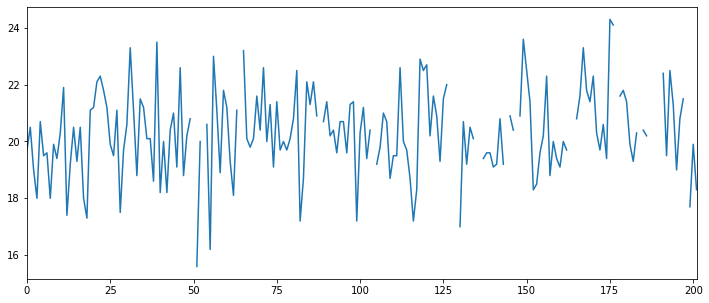

In [4]:
data['H (mag)'].plot(figsize=(12,5))

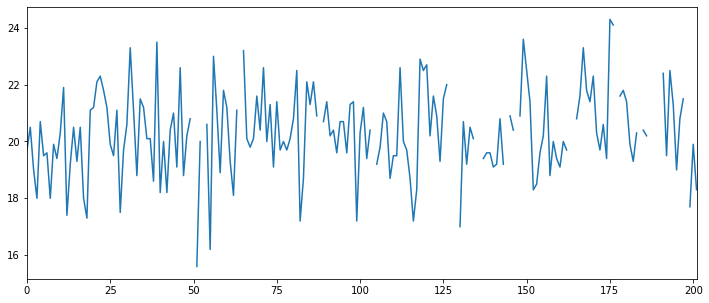

In [6]:
fig = data['H (mag)'].plot(figsize=(12,5)).get_figure()
fig.savefig("myplot2.pdf")

"ax1 = data.plot.scatter(x='Discovery Date YYYY-MM-DD',\n                       y='H (mag)',\n                       c='DarkBlue')"

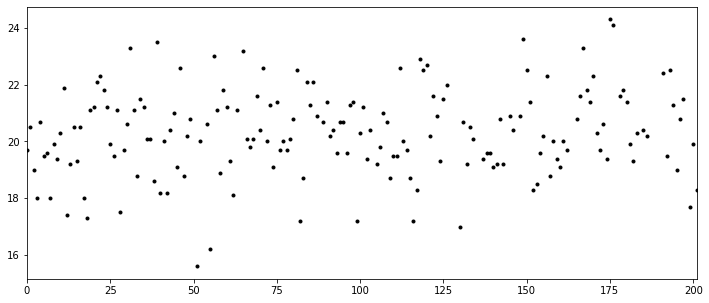

In [85]:
data['H (mag)'].plot(figsize=(12,5),style='k.')
'''ax1 = data.plot.scatter(x='Discovery Date YYYY-MM-DD',
                       y='H (mag)',
                       c='DarkBlue')'''

## classical ML algo (random forestregressor) to predict the missing value

In [169]:
x = pd.DataFrame({'Discovery Date YYYY-MM-DD':[i for i in range(50)]})
y = pd.DataFrame({'H (mag)':data['H (mag)'][:50]})

In [170]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor

regr_multirf = MultiOutputRegressor(RandomForestRegressor(max_depth=30,
                                                          random_state=0))

# Fit on the train data
regr_multirf.fit(x, y)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


MultiOutputRegressor(estimator=RandomForestRegressor(bootstrap=True,
                                                     criterion='mse',
                                                     max_depth=30,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     n_estimators='warn',
                                                     n_jobs=None,
                                                     oob_score=False,
                                                

In [187]:
regr_multirf.predict(np.array(50).reshape(1, -1))

array([[20.92]])

In [213]:
## Mean Squared Error
for i in array_null_indices:
    x = regr_multirf.predict(np.array(i).reshape(1, -1))
    data['H (mag)'][i] = x

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path

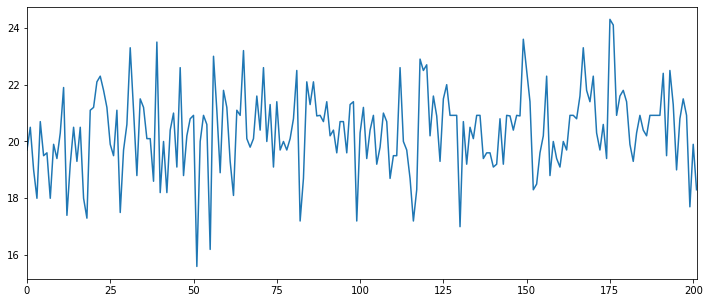

In [214]:
data['H (mag)'].plot(figsize=(12,5))

In [ ]:
## 94# accurate

## Using DL based RNNs to find relation between continous variables 

In [160]:
x = pd.DataFrame({'Discovery Date YYYY-MM-DD':[i for i in range(50)]})
y = pd.DataFrame({'H (mag)':data['H (mag)'][:50]})

In [161]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
y = sc.fit_transform(y)
x = sc.transform(x)

In [162]:

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(y[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(x, look_back)
#testX, testY = create_dataset(y, look_back)

In [165]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
#testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [168]:
## Training
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 2s - loss: 0.2390
Epoch 2/100
 - 0s - loss: 0.1756
Epoch 3/100
 - 0s - loss: 0.1336
Epoch 4/100
 - 0s - loss: 0.1064
Epoch 5/100
 - 0s - loss: 0.0874
Epoch 6/100
 - 0s - loss: 0.0758
Epoch 7/100
 - 0s - loss: 0.0684
Epoch 8/100
 - 0s - loss: 0.0636
Epoch 9/100
 - 0s - loss: 0.0606
Epoch 10/100
 - 0s - loss: 0.0591
Epoch 11/100
 - 0s - loss: 0.0573
Epoch 12/100
 - 0s - loss: 0.0566
Epoch 13/100
 - 0s - loss: 0.0560
Epoch 14/100
 - 0s - loss: 0.0555
Epoch 15/100
 - 0s - loss: 0.0548
Epoch 16/100
 - 0s - loss: 0.0546
Epoch 17/100
 - 0s - loss: 0.0545
Epoch 18/100
 - 0s - loss: 0.0544
Epoch 19/100
 - 0s - loss: 0.0543
Epoch 20/100
 - 0s - loss: 0.0541
Epoch 21/100
 - 0s - loss: 0.0543
Epoch 22/100
 - 0s - loss: 0.0539
Epoch 23/100
 - 0s - loss: 0.0539
Epoch 24/100
 - 0s - loss: 0.0538
Epoch 25/100
 - 0s - loss: 0.0538
Epoch 26/100
 - 0s - loss: 0.0536
Epoch 27/100
 - 0s - loss: 0.0537
Epoch 28/100
 - 0s - loss: 0.0541
Epoch 29/100
 - 0s - loss: 0.0540
Epoch 30/100
 - 0s - lo

In [152]:
regressor.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_31 (LSTM)               (None, 1, 5)              120       
_________________________________________________________________
dropout_23 (Dropout)         (None, 1, 5)              0         
_________________________________________________________________
lstm_32 (LSTM)               (None, 1, 5)              220       
_________________________________________________________________
dropout_24 (Dropout)         (None, 1, 5)              0         
_________________________________________________________________
dense_25 (Dense)             (None, 1, 1)              6         
Total params: 346
Trainable params: 346
Non-trainable params: 0
_________________________________________________________________


In [198]:
## Mean Squared Error
for i in array_null_indices: 
    x = model.predict(np.array(i).reshape(1,1,1))
    data['H (mag)'][i] = x

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


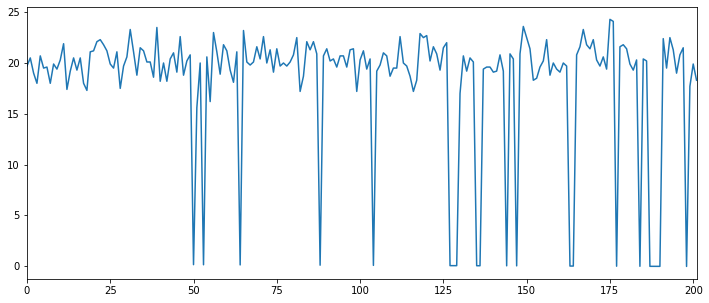

In [199]:
data['H (mag)'].plot(figsize=(12,5))

In [ ]:
## 67% accurate